# 2.9 Visualizaciones Finales  
Proyecto: Retail Sales Dataset

En este notebook generamos las **visualizaciones finales** del proyecto de Ciencia de Datos,
siguiendo las instrucciones del Proyecto Final - Parcial 3.

El objetivo es mostrar **tendencias y patrones relevantes** que apoyen la toma de decisiones
en una tienda retail, utilizando gráficos claros, interpretables y alineados con las prácticas
vistos en clase.

Usaremos el archivo:

`retail_sales_limpio.csv`

Este dataset contiene los datos depurados del proyecto (sin nulos, sin duplicados y con tipos corregidos),
y es el formato ideal para generar visualizaciones con valores reales.

Para el diseño y estilo de este notebook nos guiamos del archivo visto en clase:

**`EDA01.ipynb` – Análisis Exploratorio de Datos (EDA)**  
donde realizamos:

- Histogramas  
- Boxplots  
- Mapas de calor (heatmaps)  
- Gráficos de frecuencia  
- Interpretación de resultados  

Este notebook replica ese mismo enfoque, pero aplicado exclusivamente a las **visualizaciones finales**
que se integrarán al reporte del proyecto.



In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética básica
plt.style.use("default")
sns.set(style="whitegrid")

# Cargar dataset limpio
df = pd.read_csv("retail_sales_limpio.csv")

df.head()


,id_transaccion,fecha,id_cliente,genero,edad,categoria_producto,cantidad,precio_unitario,monto_total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 1. Preparación de columnas de fecha

Para poder graficar las ventas por mes, primero convertimos la columna `fecha`
a tipo datetime y generamos columnas derivadas:

- `anio` → año de la transacción  
- `mes` → número de mes  
- `mes_nombre` → nombre del mes (enero, febrero, etc.)

Esto nos permitirá analizar la **estacionalidad** de las ventas.


In [8]:
# Convertir columna fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columnas derivadas
df["anio"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["mes_nombre"] = df["fecha"].dt.strftime("%b")  # Ene, Feb, Mar...

df[["fecha", "anio", "mes", "mes_nombre"]].head()


,fecha,anio,mes,mes_nombre
0,2023-11-24,2023,11,Nov
1,2023-02-27,2023,2,Feb
2,2023-01-13,2023,1,Jan
3,2023-05-21,2023,5,May
4,2023-05-06,2023,5,May


## 2. Distribución de Categorías de Producto

Esta gráfica muestra **cuántas transacciones** se realizaron por cada categoría
(`categoria_producto`), lo cual ayuda a responder:

- ¿Qué tipo de productos se venden más?  
- ¿Cuáles categorías podrían ser prioritarias para inventario y marketing?

Usamos un gráfico de barras con el conteo de cada categoría.


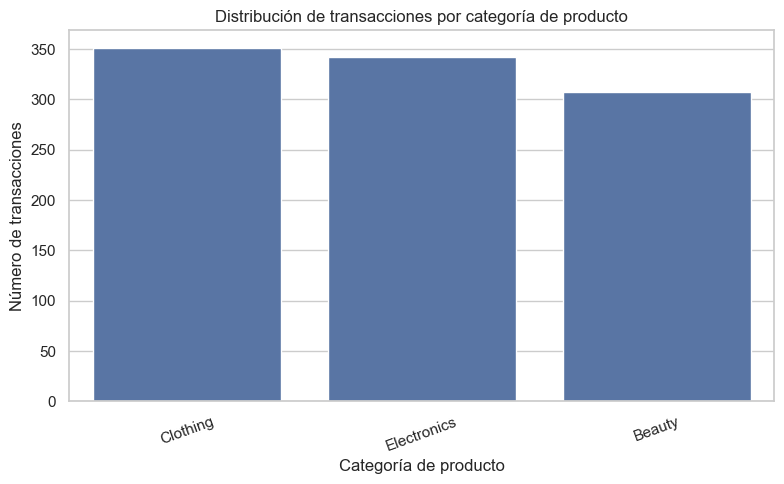

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="categoria_producto", order=df["categoria_producto"].value_counts().index)
plt.title("Distribución de transacciones por categoría de producto")
plt.xlabel("Categoría de producto")
plt.ylabel("Número de transacciones")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Interpretación

- Las barras más altas representan las categorías con **mayor número de ventas**.
- A partir de esta gráfica, la empresa puede identificar las líneas de producto más populares.
- Estas categorías podrían recibir mayor atención en campañas promocionales o en reposición de inventario.


## 3. Ventas Totales por Mes

Ahora analizamos el comportamiento de las ventas en el tiempo.
Agrupamos por `mes` y sumamos el `monto_total` para obtener las ventas mensuales.

Esta gráfica responde:

- ¿En qué meses se vende más?  
- ¿Existen temporadas altas o bajas de ventas?

Usaremos un **gráfico de líneas** (o barras) para visualizar la tendencia mensual.


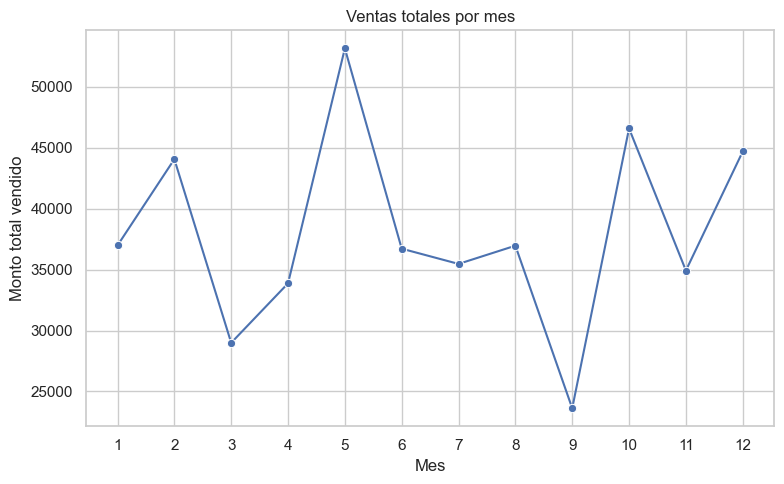

In [10]:
# Agrupar por mes y sumar monto_total
ventas_mes = df.groupby("mes")["monto_total"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=ventas_mes, x="mes", y="monto_total", marker="o")
plt.title("Ventas totales por mes")
plt.xlabel("Mes")
plt.ylabel("Monto total vendido")
plt.xticks(ticks=range(1,13))
plt.tight_layout()
plt.show()


### Interpretación

- Los puntos más altos indican los **meses con mayor volumen de ventas**.
- Si se observan picos en ciertos meses, la empresa puede relacionarlos con temporadas
  (por ejemplo: regreso a clases, fin de año, promociones, etc.).
- Esta información permite planear mejor el inventario y las campañas comerciales.


## 4. Distribución de Edad de los Clientes

También es importante conocer el perfil de los compradores.
Para ello, analizamos la columna `edad` mediante un **histograma**.

Esta gráfica permite responder:

- ¿Qué rangos de edad compran más?  
- ¿El público es principalmente joven, adulto o mixto?


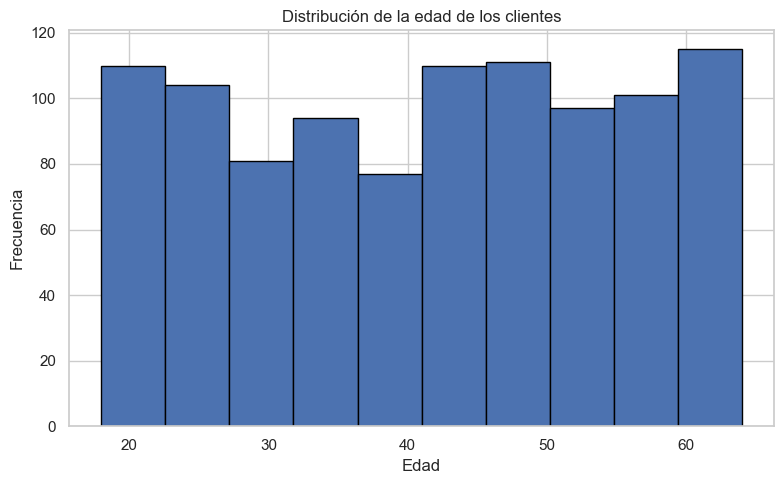

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df["edad"], bins=10, edgecolor="black")
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


### Interpretación

- El histograma muestra cuántos clientes hay en cada rango de edad.
- Si se observa concentración en ciertas edades, la empresa puede adaptar su
  comunicación y promociones a esos segmentos específicos.
- También ayuda a identificar si existen oportunidades en segmentos de edad poco atendidos.


## 5. Heatmap de Correlación entre Variables Numéricas

Finalmente, analizamos la relación entre las variables numéricas:

- edad  
- cantidad  
- precio_unitario  
- monto_total  

Calculamos la **matriz de correlación** y la mostramos con un **heatmap**.
Esto ayuda a identificar qué variables están más relacionadas con el monto total de la compra.


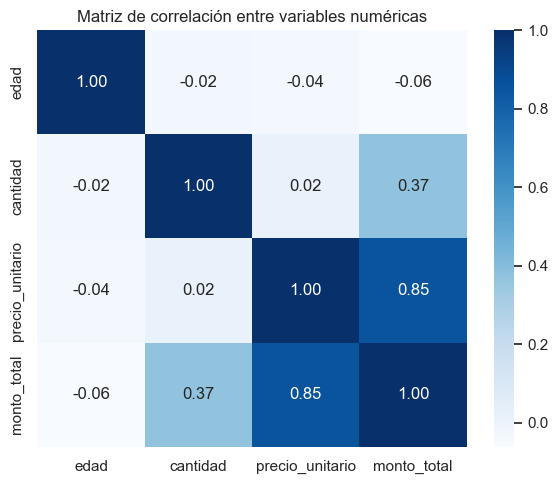

In [12]:
# Seleccionar solo columnas numéricas relevantes
num_cols = ["edad", "cantidad", "precio_unitario", "monto_total"]
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


### Interpretación

- Los valores cercanos a 1 indican correlación positiva fuerte.
- Los valores cercanos a -1 indican correlación negativa fuerte.
- Una correlación alta entre `cantidad`, `precio_unitario` y `monto_total`
  confirma que estas variables influyen directamente en el total de la compra.
- Esta información respalda las decisiones de modelado y las conclusiones del proyecto.


# 6. Conclusión de las Visualizaciones Finales

En este notebook generamos cuatro visualizaciones clave:

1. **Distribución de categorías de producto**  
2. **Ventas totales por mes**  
3. **Distribución de edad de los clientes**  
4. **Heatmap de correlación de variables numéricas**

Estas gráficas permiten:

- Identificar las categorías más vendidas.
- Detectar meses con mayor o menor actividad comercial.
- Conocer el perfil de edad de los clientes.
- Confirmar la relación entre las variables y el monto total de compra.

Todas las visualizaciones están basadas en el dataset limpio
`retail_sales_limpio.csv` y se integrarán al **reporte final en PDF**
como evidencia gráfica del análisis realizado.
